# Lambda house

A lambda house is a reference house that can be set anywhere during upstream design phases of a building to get a better understanding of a site and the impact of decisions during the design.

The next entry makes it possible to customize the lambda house to better match the context.


In [1]:
%matplotlib inline
import buildingenergy.lambdahouse


class Configuration(buildingenergy.lambdahouse.Configuration):

    def __init__(self):
        super().__init__()
        # site
        self.weather_file_name = 'refuge-des-bans.json'
        self.weather_year = 2019
        self.sea_level_in_meter = 2074
        self.albedo = 0.1
        self.sky_horizon = [(121.4, 23.8), (104.3, 22.5), (90, 18.9), (69.9, 25), (45, 30.3), (26.6, 25.3), (13.4, 27.3), (0, 25), (0, 28.4), (-13.3, 24.3), (-30.1, 20.2), (-54.9, 12.9), (-60.3, 8.7), (-64.4, 9.2), (-106.4, 7.6), (-112.8, 9.8), (-118.7, 12.2)]
        # lambda house geometry
        self.total_living_surface= 100
        self.height_per_floor = 3
        self.shape_factor = 1
        self.number_of_floors = 1
        self.wall_composition_in_out = (('polystyrene', 16e-2), ('concrete', 13e-2), ('plaster', 13e-3))
        self.roof_composition_in_out = (('brick', 2e-2), ('foam', 16e-2), ('plaster', 13e-3))
        self.glass_composition_in_out = (('glass', 5e-3), ('air', 12e-2), ('glass_foam', 5e-3))
        self.ground_composition_in_out = (('concrete', 13e-2), ('polystyrene', 16e-2), ('gravels', 50e-2))
        self.shape_factors = [.25, .5, .75, 1, 1.25, 1.5, 1.75, 2]
        # lambda house windows
        self.offset_exposure = 0
        self.offset_exposures = [alpha for alpha in range(-90, 90, 5)]
        self.beta = {'north': 0.1, 'west': 0.1, 'east': 0.1, 'south': 0.1}
        self.beta_variation = [0, .1, .2, .4, .8]
        self.solar_factor = 0.85
        self.south_solar_protection_angle = 60
        # lambda house HVAC
        self.high_heating_setpoint = 21
        self.high_heating_setpoints = [18, 19, 20, 21, 22, 23]  # 20 has to be in the list
        self.low_heating_setpoint = 17
        self.cooling_setpoint = 23
        self.air_renewal = 0.8
        self.ventilation_heat_recovery_efficiency = 0.85
        # lambda house occupancy
        self.occupancy_schema = { # days of weeks (1=Monday,...), period (start. hour, end. hour) : avg occupancy
            (1, 2, 3, 4, 5): {(18,8): 3, (8, 18): 0},
            (6, 7): {(0, 24): 2}
            }
        self.average_occupancy_gain = 150
        self.average_permanent_gain = 50
        # lambda house production
        self.PV_efficiency = 0.15

> selected location: Refuge des Bans
* available location> Refuge des Bans
# Report dealing with a lambda-house with weather file refuge-des-bans.json 


## Features of the Lambda House 
### Site 
* Weather file name: refuge-des-bans.json (year: 2019)
* sea level in meter: 2074 
* albedo: 0.100000 (reflexion of the ground) 
* sky horizon: (AZ:-120.000000, AL:30.000000),(AZ:30.000000, AL:15.000000),(AZ:0.000000, AL:5.000000),
### Geometry 
* total living surface 100m2 (100m2 / floor) 
* number of floors 1 
* height 3.00m 
* shape factor 100% (the higher value the larger the south and north sides, the smaller the west and east sides) 
* shape factors for parametric study: 25%, 50%, 75%, 100%, 125%, 150%, 175%, 200%, 
 wall composition in out 
	+ polystyrene with thickness: 16.0cm
	+ concrete with thickness: 13.0cm
	+ plaster with thickness: 1.3cm
* roof_composition_in_out 
	+ brick with thickness: 2.0cm 
	+ foam with thickness: 16.0cm 
	+ plaster with thickness: 1.3cm 
* glass_compositio

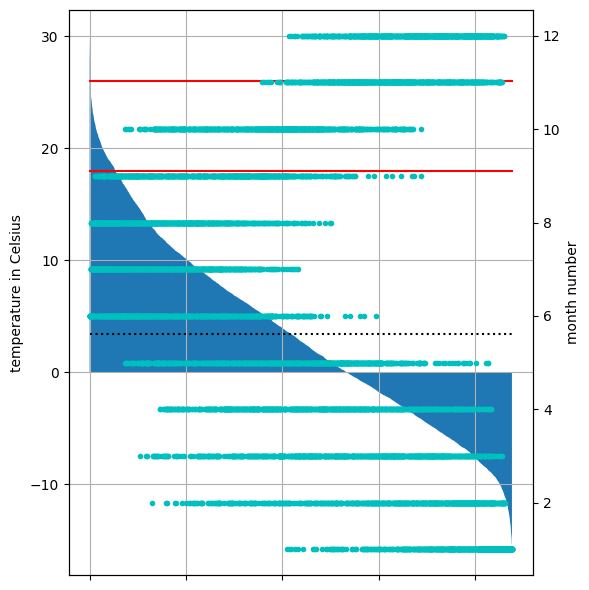

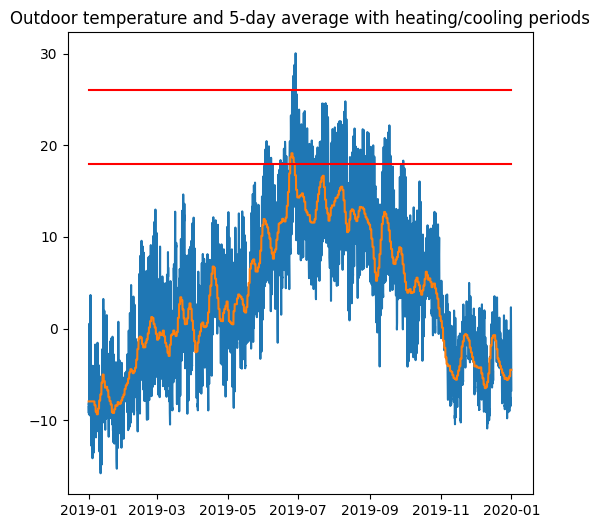

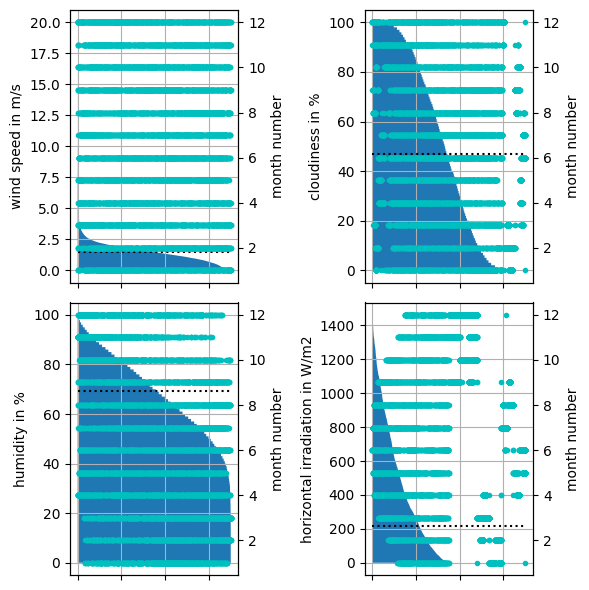

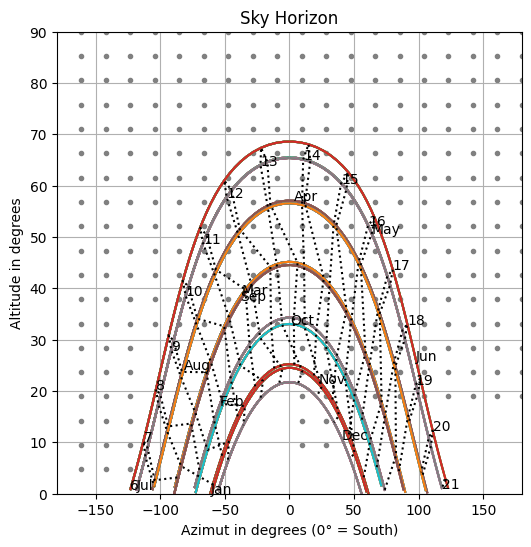

## House Analysis

Detected heating period: 28 June till 24 June


Energy needs from heater without inertia (useless heat is free power gain not useful for heating because the temperature is higher than the requested set-point)

Energy needs from heater with inertia (useless heat is free power gain not useful for heating because the temperature is higher than the requested set-point)

No cooling needs without inertia.

No cooling needs with inertia.

## Zero energy over the year

The aim is to appreciate the yearly energy needed by the HVAC system. To do it, the carbon neutrality is searched thanks to a surface of PV panels.

Best PV exposure: 7° and slope 35°

- Required surface of PV for balancing the annual energy consumption of the HVAC system:

+---------------------+------------+---------+
| PV (efficiency: 0%) | no inertia | inertia |
+---------------------+------------+---------+
|        heater       |    51m2    |   38m2  |
|   air conditioning  |    0m2     |    0m2  |
|    

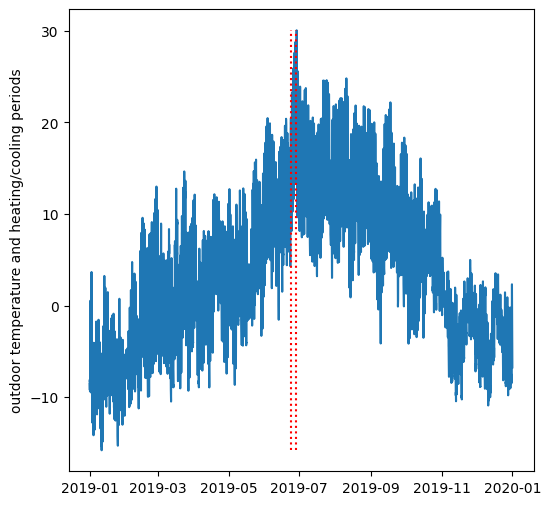

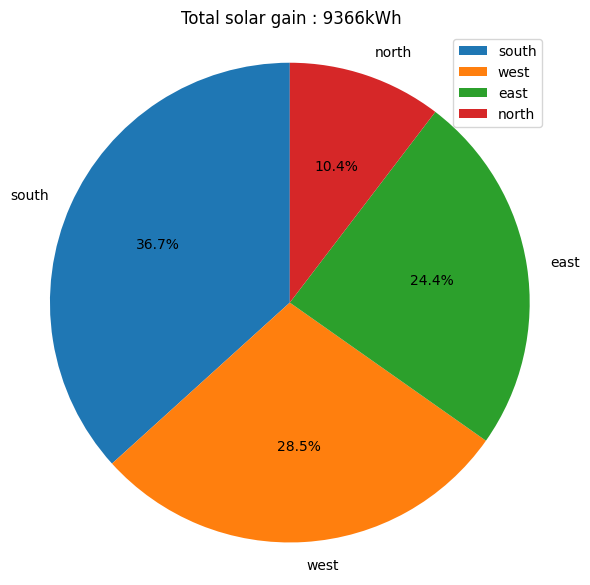

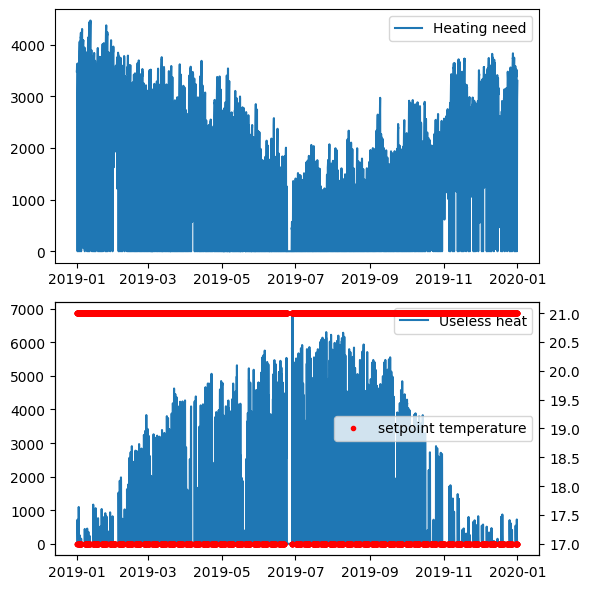

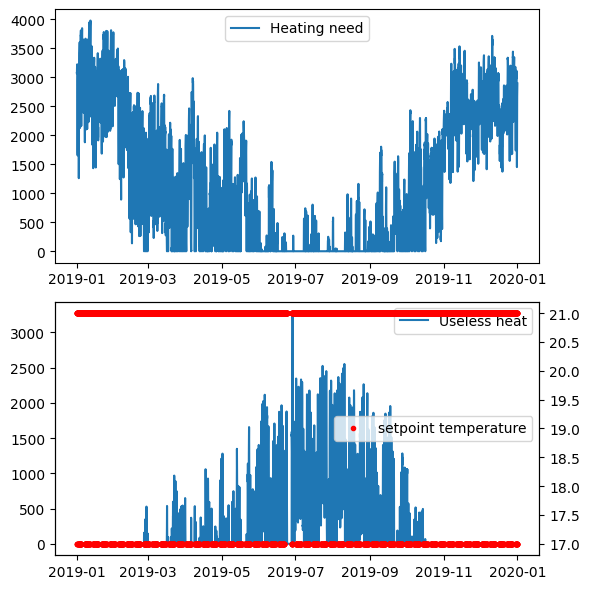

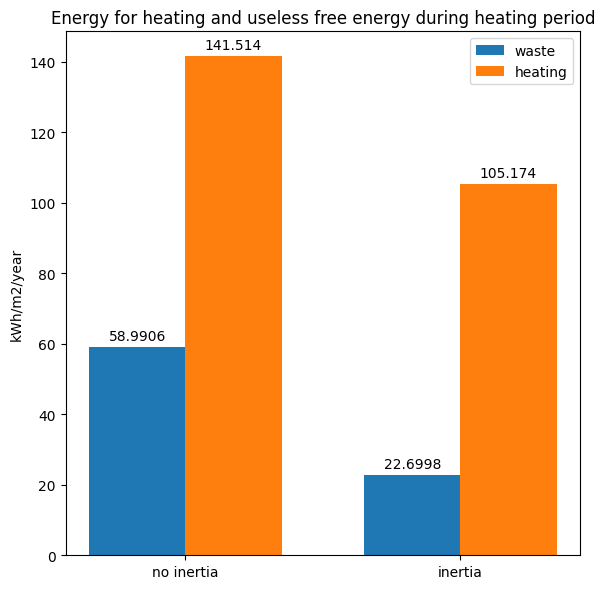

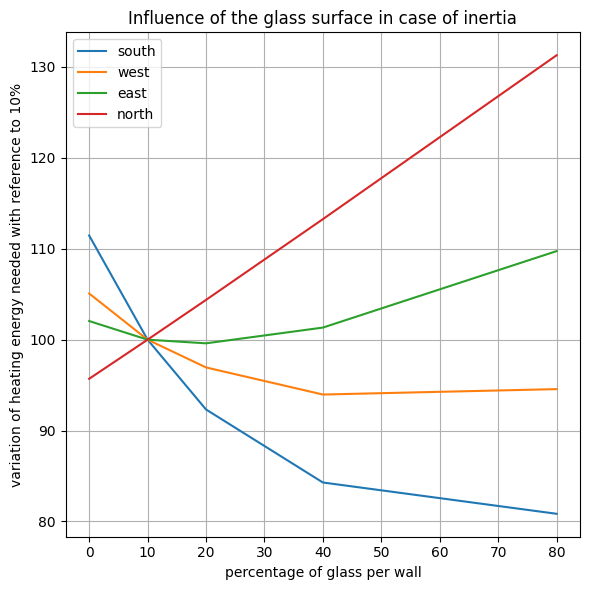

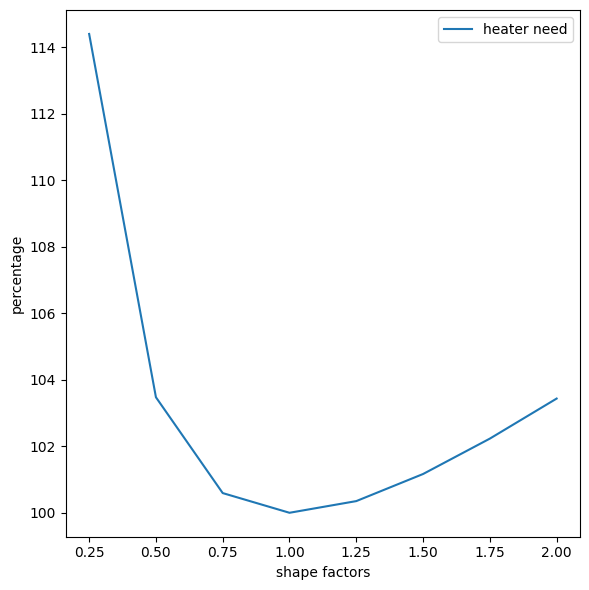

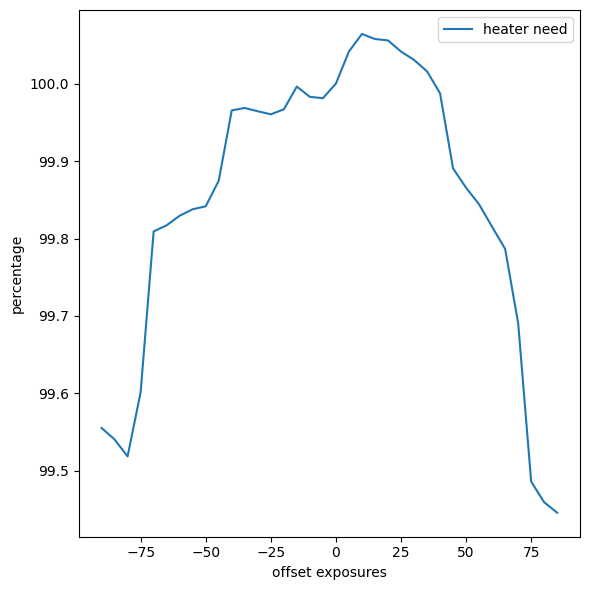

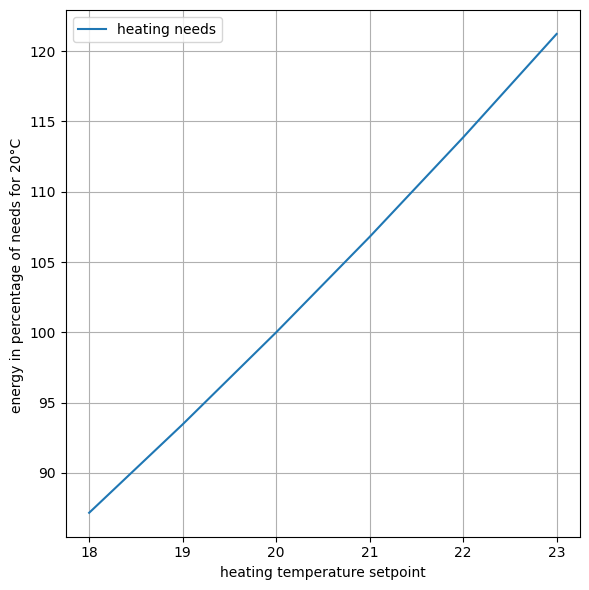

In [2]:
for _ in buildingenergy.lambdahouse.House(Configuration()).results():
    pass